In [ ]:
import pandas as pd 
res = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi.csv")[:]
res

: 

In [1]:
# a = res.head(30)
# a[a['domain']=='finance']

In [43]:
len(res)
res['source'] = res['mask'].str.replace('_ours8_global', '', regex=False) 
res['source'] = res['source'].str.replace('instruct', '', regex=False) 
res["equal"] = res["source"] == res["domain"]
res

,mask,domain,mean_perplexity,median_perplexity,source,equal
0,instructcoding_ours4_global,coding,338853.556643,365.744995,coding_ours4_global,False
1,instructcoding_ours6_global,coding,5195.068821,9.563066,coding_ours6_global,False
2,instructcoding_ours8_global,coding,31.736403,3.360077,coding,True
3,instructcoding_ours10_global,coding,8.477215,2.693456,coding_ours10_global,False
4,instructcoding_ours12_global,coding,28.432430,2.426204,coding_ours12_global,False
5,instructmedical_ours4_global,medical,1576.527814,224.641701,medical_ours4_global,False
6,instructmedical_ours6_global,medical,91.638536,4.588448,medical_ours6_global,False
7,instructmedical_ours8_global,medical,25252.610478,2.602456,medical,True
8,instructmedical_ours10_global,medical,5889.289348,2.247177,medical_ours10_global,False
9,instructmedical_ours12_global,medical,1663.343965,2.127388,medical_ours12_global,False


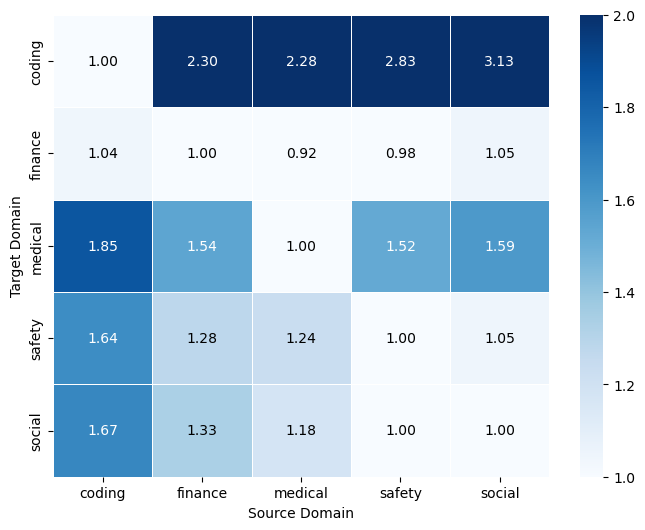

In [4]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt 
df =res.head(25)

# 创建透视表，将 median_perplexity 转换为 5x5 矩阵  
matrix = df.pivot_table(index='domain', columns='source', values='median_perplexity')  
for i in range(len(matrix)):  
    if matrix.iloc[i, i] != 0:  # 避免除以零  
        matrix.iloc[i] = matrix.iloc[i] / matrix.iloc[i, i]  

# 确保矩阵是 5x5 的，如果不够可以填充 NaN  
# matrix = matrix.reindex(index=['A', 'B', 'C', 'D', 'E'], columns=['W', 'X', 'Y'], fill_value=np.nan)  
# matrix.fillna(0, inplace=True)  # 这里用 0 填充 NaN  
# 设置颜色条范围  
vmin = 1  # 最小值  
vmax = 2  # 最大值  

# 绘制热图  
plt.figure(figsize=(8, 6))  
sns.heatmap(matrix, annot=False,  cbar=True,  linewidths=.5, vmin=vmin, vmax=vmax,cmap='Blues')  
for i in range(matrix.shape[0]):  
    for j in range(matrix.shape[1]):  
        if matrix.iloc[i, j]>1.5:
            plt.text(j + 0.5, i + 0.5, f'{matrix.iloc[i, j]:.2f}',   
                 ha='center', va='center', color='white')
        else:
            plt.text(j + 0.5, i + 0.5, f'{matrix.iloc[i, j]:.2f}',   
                    ha='center', va='center', color='black')  



# plt.title('Median Perplexity Matrix')  
plt.xlabel('Source Domain')  
plt.ylabel('Target Domain')  
plt.show()  

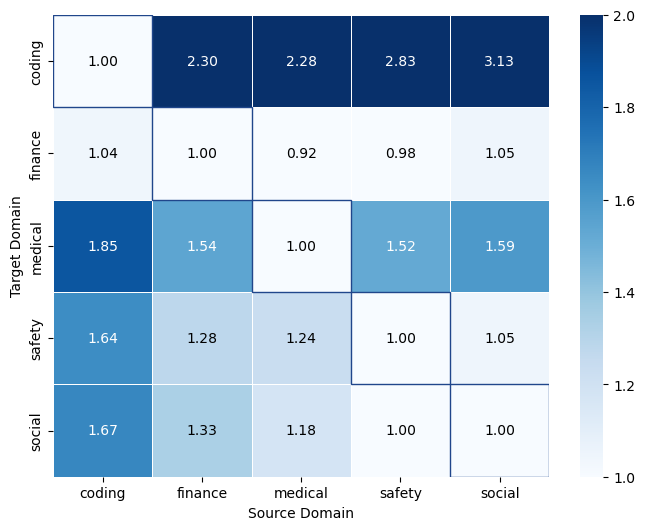

In [39]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Sample data for demonstration  
df = res.head(25)  

# Create a pivot table to convert median_perplexity into a 5x5 matrix  
matrix = df.pivot_table(index='domain', columns='source', values='median_perplexity')  

# Normalize each row by its diagonal element  
for i in range(len(matrix)):  
    if matrix.iloc[i, i] != 0:  # Avoid division by zero  
        matrix.iloc[i] = matrix.iloc[i] / matrix.iloc[i, i]  

# Set color bar range  
vmin = 1  # Minimum value  
vmax = 2  # Maximum value  

# Plot the heatmap  
plt.figure(figsize=(8, 6))  
sns.heatmap(matrix, annot=False, cbar=True, linewidths=.5, vmin=vmin, vmax=vmax, cmap='Blues')  

# Add text annotations  
for i in range(matrix.shape[0]):  
    for j in range(matrix.shape[1]):  
        color = 'white' if matrix.iloc[i, j] > 1.5 else 'black'  
        plt.text(j + 0.5, i + 0.5, f'{matrix.iloc[i, j]:.2f}', ha='center', va='center', color=color)  

# Draw a border around the diagonal cells  
ax = plt.gca()  
for i in range(min(matrix.shape[0], matrix.shape[1])):  
    rect = plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='#20468b', linewidth=1)  
    ax.add_patch(rect)  

# Set labels  
plt.xlabel('Source Domain')  
plt.ylabel('Target Domain')  
plt.show()

In [16]:
# import pandas as pd  
# import numpy as np  
# import seaborn as sns  
# import matplotlib.pyplot as plt   

# # 创建示例数据  
# data = np.random.rand(10, 12)  
# matrix = pd.DataFrame(data, columns=[f'Col {i}' for i in range(1, 13)], index=[f'Row {i}' for i in range(1, 11)])  

# # 设置图形大小  
# plt.figure(figsize=(10, 8))  

# # 示例 1: 使用 Blues 色图  
# plt.subplot(2, 2, 1)  
# sns.heatmap(matrix, cmap='Blues', cbar=True, linewidths=.5)  
# plt.title('Blues Colormap')  

# # 示例 2: 使用 coolwarm 色图  
# plt.subplot(2, 2, 2)  
# sns.heatmap(matrix, cmap='coolwarm', cbar=True, linewidths=.5)  
# plt.title('Coolwarm Colormap')  

# # 示例 3: 使用 RdBu 色图  
# plt.subplot(2, 2, 3)  
# sns.heatmap(matrix, cmap='RdBu', cbar=True, linewidths=.5)  
# plt.title('RdBu Colormap')  

# # 示例 4: 使用 YlGnBu 色图  
# plt.subplot(2, 2, 4)  
# sns.heatmap(matrix, cmap='YlGnBu', cbar=True, linewidths=.5)  
# plt.title('YlGnBu Colormap')  

# plt.tight_layout()  
# plt.show()

<!-- 开始对于问题1的分析 -->

In [28]:
domain_list = list(res['domain'].unique())
if 'code' in domain_list:
    domain_list.remove('code')
domain_list
res_q1 = []
for domain in domain_list:
    for save_num in [6,8,10,12,16]:
        
        file_name = '/data/naifanzhang/moe_purning/Infinity-Instruct/code/output/'+ domain+'_instruct'+domain+'_ours'+str(save_num)+'_global_normal.parquet'
        data = pd.read_parquet(file_name)
        threshold = data['perplexity'].quantile(0.95) 
        # 过滤掉 perplexity 列中大于阈值的行 
        data = data[data['perplexity'] <= threshold]
        res_q1.append([domain, save_num, data['perplexity'].mean(),'ours'])
        if save_num!=16:
            file_name = '/data/naifanzhang/moe_purning/Infinity-Instruct/code/output/'+ domain+'_instruct'+domain+'_baseline'+str(save_num)+'_normal.parquet'
            data = pd.read_parquet(file_name)
            threshold = data['perplexity'].quantile(0.95) 
            # 过滤掉 perplexity 列中大于阈值的行 
            data = data[data['perplexity'] <= threshold]
            res_q1.append([domain, save_num, data['perplexity'].mean(),'baseline'])
res_q1_df = pd.DataFrame(res_q1, columns=['domain', 'save_num', 'mean_perplexity','method'])
res_q1_df
#     print(domain)
#     print(res[res['domain']==domain].sort_values(by='median_perplexity').head(1))
# 

,domain,save_num,mean_perplexity,method
0,finance,6,15.492851,ours
1,finance,6,138.130555,baseline
2,finance,8,4.470329,ours
3,finance,8,4.369560,baseline
4,finance,10,2.846559,ours
5,finance,10,3.296942,baseline
6,finance,12,2.616148,ours
7,finance,12,2.776589,baseline
8,finance,16,2.473049,ours
9,medical,6,5.796695,ours


In [30]:
append_df = res_q1_df[res_q1_df['save_num']==16]
append_df['method']='baseline'
res_q1_df = pd.concat([res_q1_df,append_df])

/tmp/ipykernel_86830/3535700292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  append_df['method']='baseline'


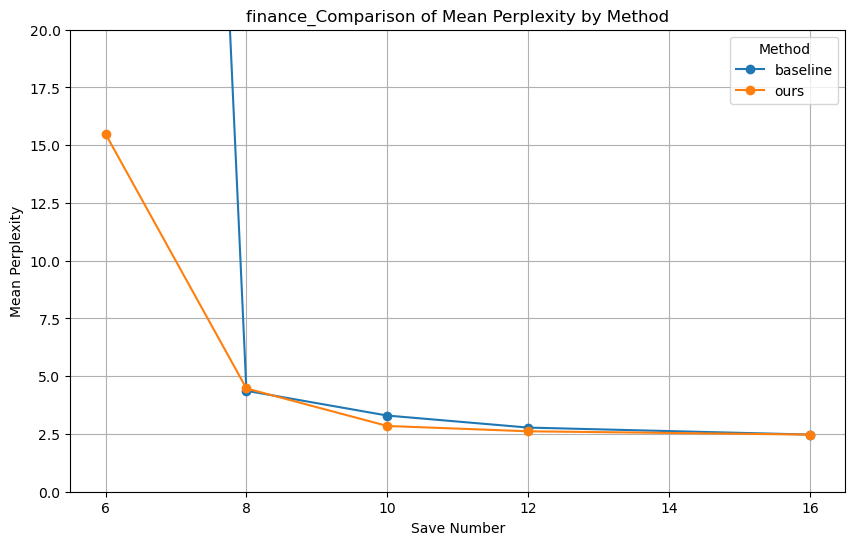

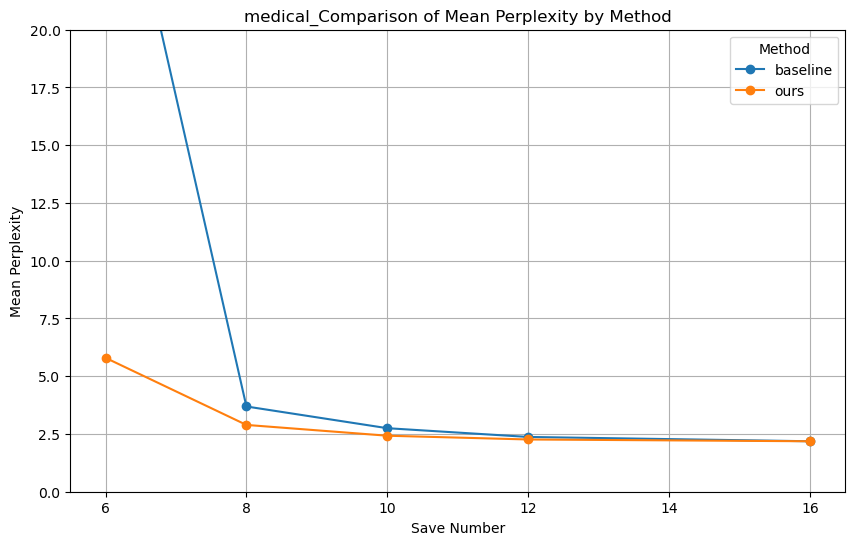

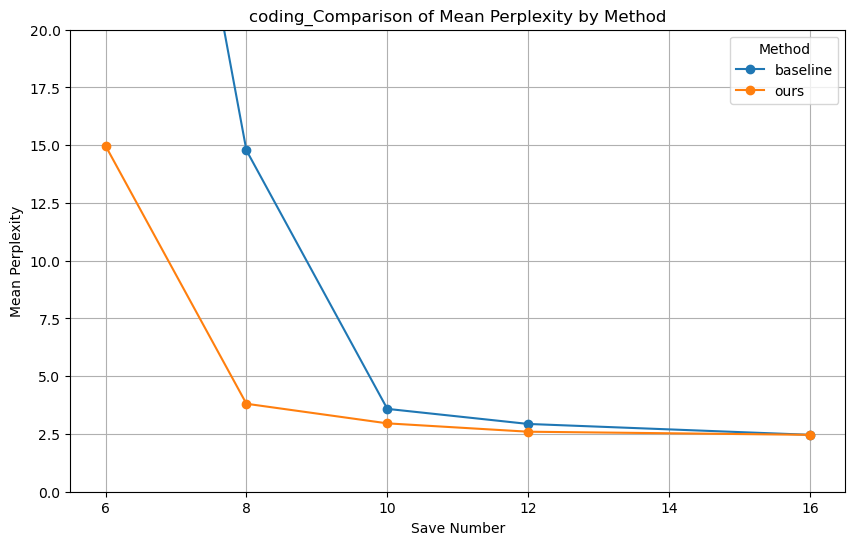

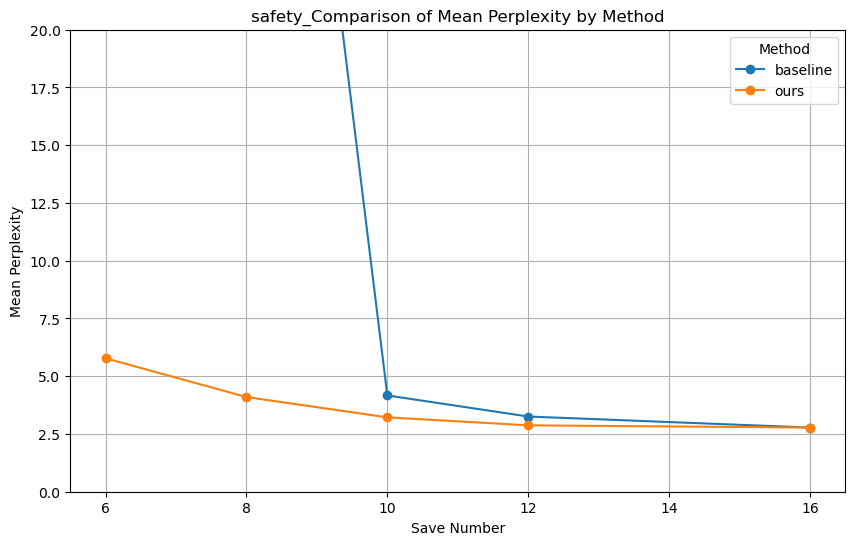

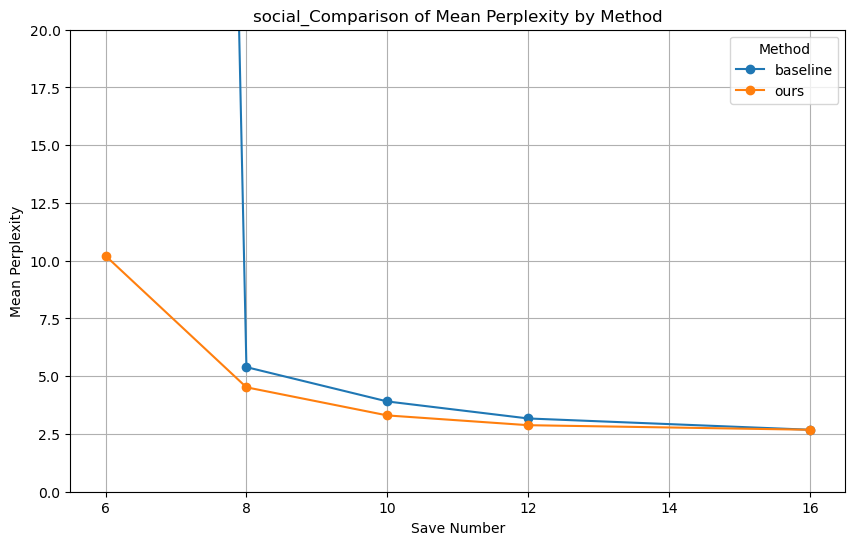

In [31]:
for domain in domain_list:
    df = res_q1_df[res_q1_df['domain']==domain]

    # 确保数据按save_num排序  
    df = df.sort_values(by='save_num')  

    # 使用pivot_table将数据整理成适合绘图的格式  
    pivot_df = df.pivot_table(index='save_num', columns='method', values='mean_perplexity')  

    # 绘制图形  
    plt.figure(figsize=(10, 6))  
    for method in pivot_df.columns:  
        plt.plot(pivot_df.index, pivot_df[method], label=method, marker='o')  

    # 添加图例和标签  
    plt.xlabel('Save Number')  
    plt.ylabel('Mean Perplexity')  
    plt.title(domain +'_Comparison of Mean Perplexity by Method')  
    plt.legend(title='Method')  
    plt.grid(True)  
    plt.ylim(0, 20)
    # 显示图形  
    plt.show()  

In [33]:
res_q1_df

,domain,save_num,mean_perplexity,method
0,finance,6,15.492851,ours
1,finance,6,138.130555,baseline
2,finance,8,4.470329,ours
3,finance,8,4.369560,baseline
4,finance,10,2.846559,ours
5,finance,10,3.296942,baseline
6,finance,12,2.616148,ours
7,finance,12,2.776589,baseline
8,finance,16,2.473049,ours
9,medical,6,5.796695,ours


In [26]:
domain_list

['finance', 'medical', 'coding', 'safety', 'social']

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


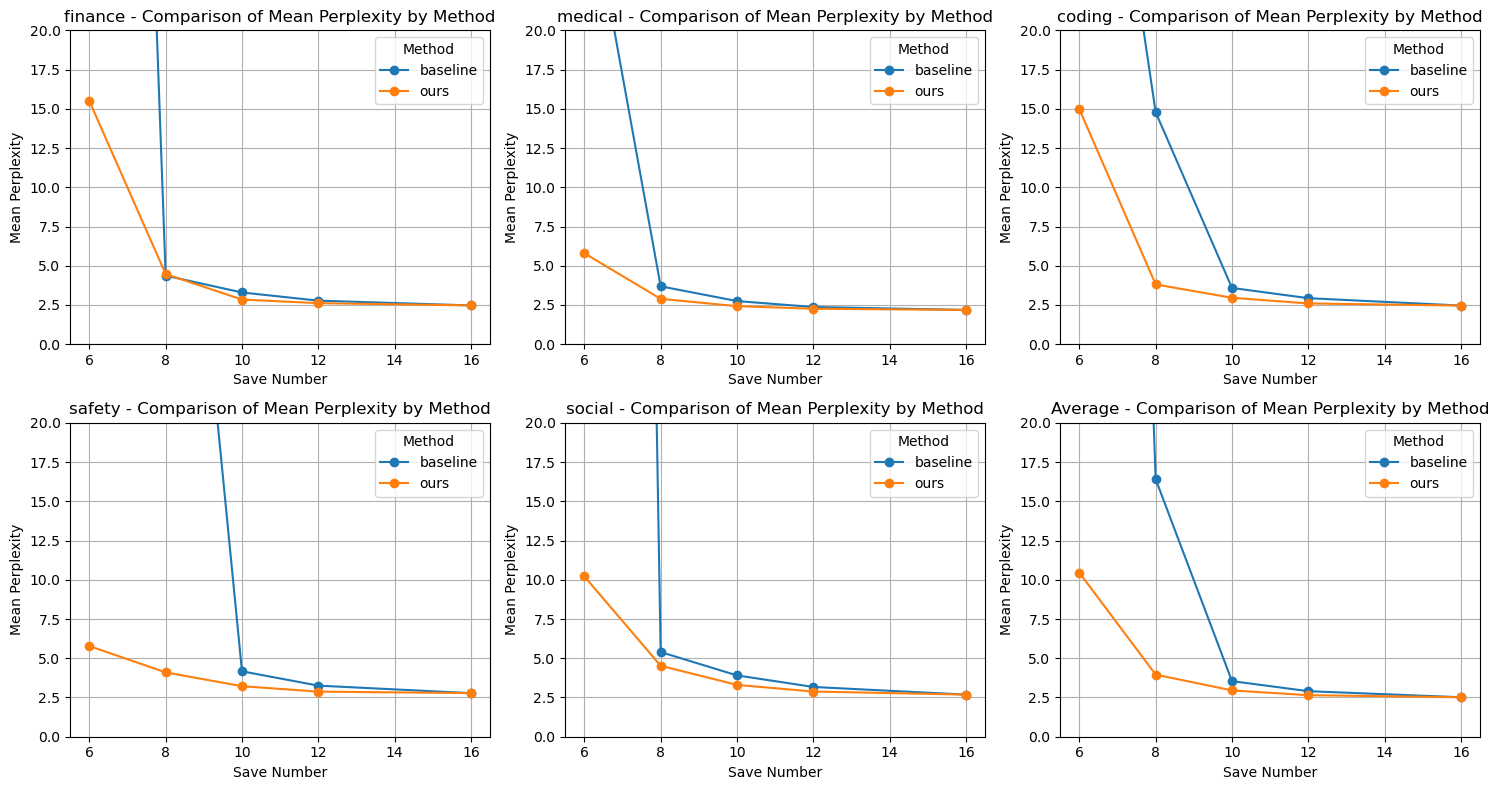

In [34]:
import matplotlib.pyplot as plt  

# Assuming domain_list is your list of domains  
num_domains = len(domain_list)  
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Create a 2x3 grid of subplots  

# Flatten the axes array for easy iteration  
axes = axes.flatten()  

for i, domain in enumerate(domain_list):  
    if i >= 5:  # Only plot the first 5 domains  
        break  

    df = res_q1_df[res_q1_df['domain'] == domain]  

    # Ensure data is sorted by save_num  
    df = df.sort_values(by='save_num')  

    # Use pivot_table to reshape data for plotting  
    pivot_df = df.pivot_table(index='save_num', columns='method', values='mean_perplexity')  

    # Plot on the respective subplot  
    ax = axes[i]  
    for method in pivot_df.columns:  
        ax.plot(pivot_df.index, pivot_df[method], label=method, marker='o')  

    # Add legend and labels  
    ax.set_xlabel('Save Number')  
    ax.set_ylabel('Mean Perplexity')  
    ax.set_title(domain + ' - Comparison of Mean Perplexity by Method')  
    ax.legend(title='Method')  
    ax.grid(True)  
    ax.set_ylim(0, 20)  

# Calculate the average mean_perplexity across all domains  
average_df = res_q1_df.groupby(['save_num', 'method'])['mean_perplexity'].mean().reset_index()  

# Pivot the average data for plotting  
average_pivot_df = average_df.pivot(index='save_num', columns='method', values='mean_perplexity')  

# Plot the average mean_perplexity in the last subplot  
ax = axes[-1]  # Use the last subplot  
for method in average_pivot_df.columns:  
    ax.plot(average_pivot_df.index, average_pivot_df[method], label=method, marker='o')  

# Add legend and labels for the average plot  
ax.set_xlabel('Save Number')  
ax.set_ylabel('Mean Perplexity')  
ax.set_title('Average - Comparison of Mean Perplexity by Method')  
ax.legend(title='Method')  
ax.grid(True)  
ax.set_ylim(0, 20)  

# Hide the unused subplot if there are fewer than 6 domains  
if num_domains < 6:  
    for j in range(num_domains, 5):  
        fig.delaxes(axes[j])  

# Adjust layout to prevent overlap  
plt.tight_layout()  

# Show the figure  
plt.show()

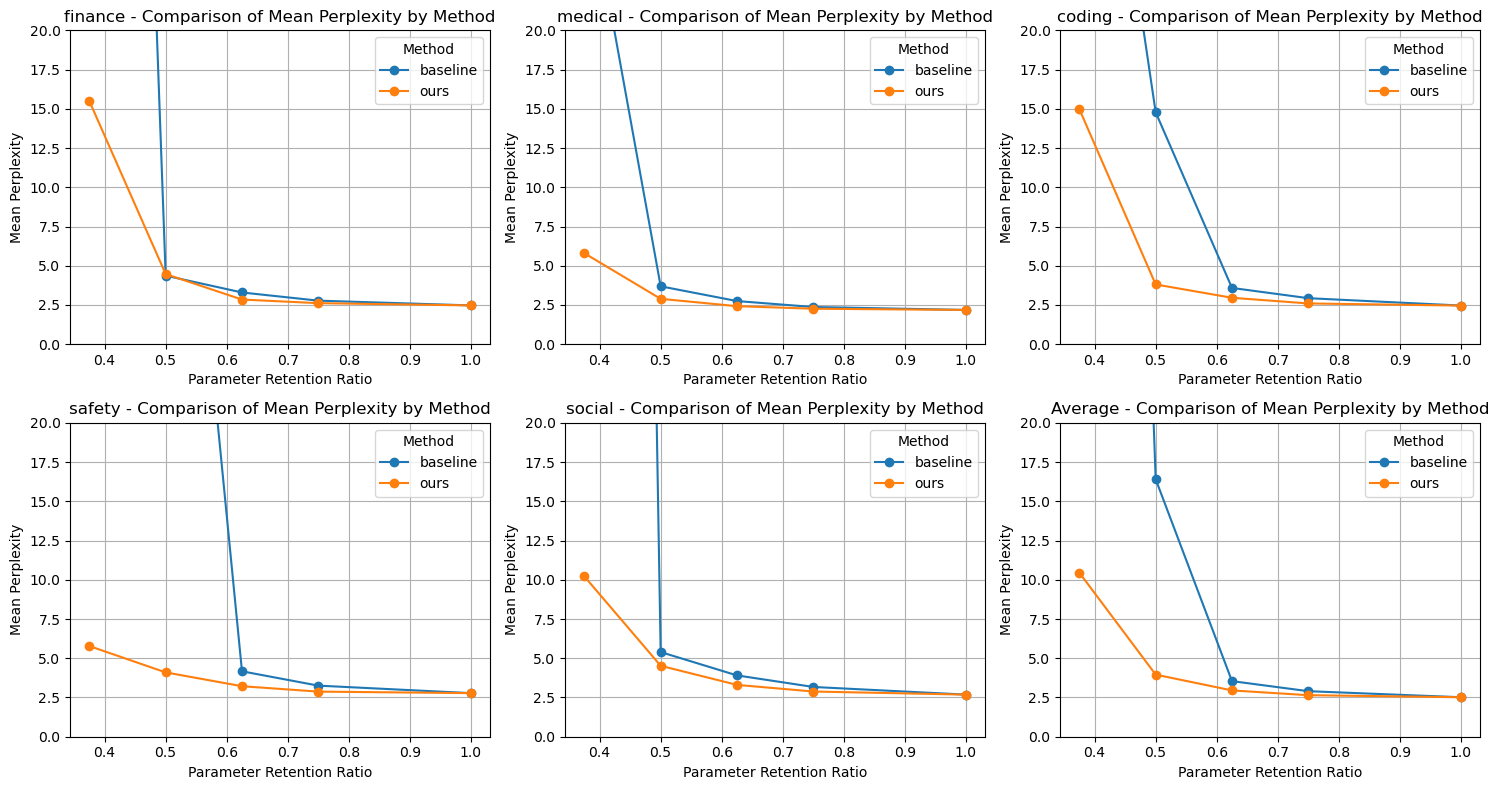

In [35]:
import matplotlib.pyplot as plt  

# Assuming domain_list is your list of domains  
num_domains = len(domain_list)  
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Create a 2x3 grid of subplots  

# Flatten the axes array for easy iteration  
axes = axes.flatten()  

for i, domain in enumerate(domain_list):  
    if i >= 5:  # Only plot the first 5 domains  
        break  

    df = res_q1_df[res_q1_df['domain'] == domain]  

    # Ensure data is sorted by save_num  
    df = df.sort_values(by='save_num')  

    # Use pivot_table to reshape data for plotting  
    pivot_df = df.pivot_table(index='save_num', columns='method', values='mean_perplexity')  

    # Plot on the respective subplot  
    ax = axes[i]  
    for method in pivot_df.columns:  
        # Adjust x-axis values by dividing by 16  
        ax.plot(pivot_df.index / 16, pivot_df[method], label=method, marker='o')  

    # Add legend and labels  
    ax.set_xlabel('Parameter Retention Ratio')  # Update x-axis label  
    ax.set_ylabel('Mean Perplexity')  
    ax.set_title(domain + ' - Comparison of Mean Perplexity by Method')  
    ax.legend(title='Method')  
    ax.grid(True)  
    ax.set_ylim(0, 20)  

# Calculate the average mean_perplexity across all domains  
average_df = res_q1_df.groupby(['save_num', 'method'])['mean_perplexity'].mean().reset_index()  

# Pivot the average data for plotting  
average_pivot_df = average_df.pivot(index='save_num', columns='method', values='mean_perplexity')  

# Plot the average mean_perplexity in the last subplot  
ax = axes[-1]  # Use the last subplot  
for method in average_pivot_df.columns:  
    # Adjust x-axis values by dividing by 16  
    ax.plot(average_pivot_df.index / 16, average_pivot_df[method], label=method, marker='o')  

# Add legend and labels for the average plot  
ax.set_xlabel('Parameter Retention Ratio')  # Update x-axis label  
ax.set_ylabel('Mean Perplexity')  
ax.set_title('Average - Comparison of Mean Perplexity by Method')  
ax.legend(title='Method')  
ax.grid(True)  
ax.set_ylim(0, 20)  

# Hide the unused subplot if there are fewer than 6 domains  
if num_domains < 6:  
    for j in range(num_domains, 5):  
        fig.delaxes(axes[j])  

# Adjust layout to prevent overlap  
plt.tight_layout()  

# Show the figure  
plt.show()